In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift

# K-means clustering

In [48]:
## Takes around 1 minute for the segmented images to load up

def kmeans(image, k, iters):
    
        C = []

        for i in range(k):
            centroids = image[np.random.randint(0, image.shape[0]-1)]
            C.append(centroids)
        C = np.asarray(C)   
        
        clusters = np.zeros(len(image), dtype = int)
        
        #iterating number of times defined
        for x in range(iters):
                #computing euclidean distances
            for i in range(len(image)):
                distances = np.linalg.norm(image[i] - C, axis=1)
                #storing to nearest cluster
                cluster = np.argmin(distances)
                clusters[i] = cluster
           
            # New centroids using mean
            for i in range(k):
                points = [image[j] for j in range(len(image)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
        return clusters, C

               


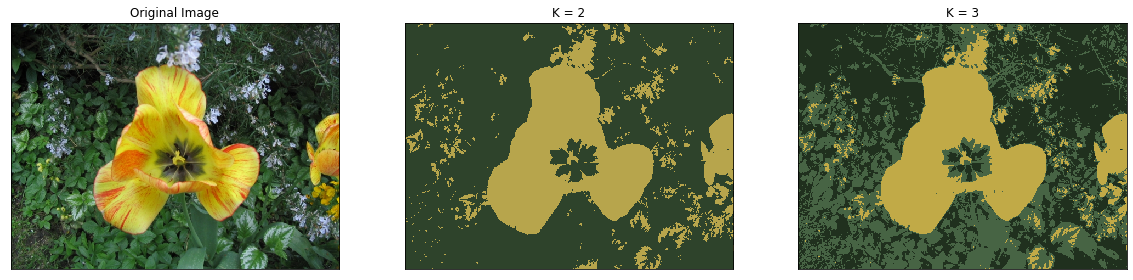

In [49]:
img1 = cv2.imread('flower.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img = img1.reshape((-1, 3))
img = np.float32(img)

#k means to find segmented images  
labels2, centers2 = kmeans(img, 2, 5)
labels3, centers3 = kmeans(img, 3, 5)


centers2 = np.uint8(centers2)
seg2 = centers2[labels2.flatten()]
centers3 = np.uint8(centers3)
seg3 = centers3[labels3.flatten()]


#reshaping images
seg2 = seg2.reshape(img1.shape)
seg3 = seg3.reshape(img1.shape)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img1)
plt.xticks([]), plt.yticks([]), plt.title("Original Image")
plt.subplot(132), plt.imshow(seg2)
plt.xticks([]), plt.yticks([]), plt.title("K = 2")
plt.subplot(133), plt.imshow(seg3)
plt.xticks([]), plt.yticks([]), plt.title("K = 3")

plt.show()

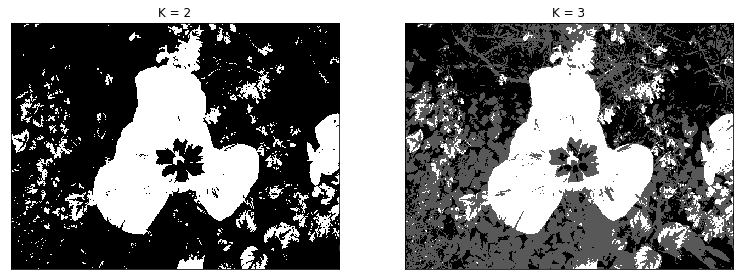

In [57]:
img1 = cv2.imread('flower.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = img1.reshape((-1, 1))
img = np.float32(img)

#k means to find segmented images        
labels2, centers2 = kmeans(img, 2, 5)
labels3, centers3 = kmeans(img, 3, 5)


centers2 = np.uint8(centers2)
seg2 = centers2[labels2.flatten()]
centers3 = np.uint8(centers3)
seg3 = centers3[labels3.flatten()]


#reshaping images
seg2 = seg2.reshape(img1.shape)
seg3 = seg3.reshape(img1.shape)

plt.figure(figsize=(20,20))
plt.subplot(132), plt.imshow(seg2, cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title("K = 2")
plt.subplot(133), plt.imshow(seg3,cmap ="gray")
plt.xticks([]), plt.yticks([]), plt.title("K = 3")

plt.show()

Both the features for segmentation almost give similar result. However, with colour segmentation, the result is slightly better since colour of similar pixel range are clustered more efficiently compared to grey scale image. 

# Expectation Maximization

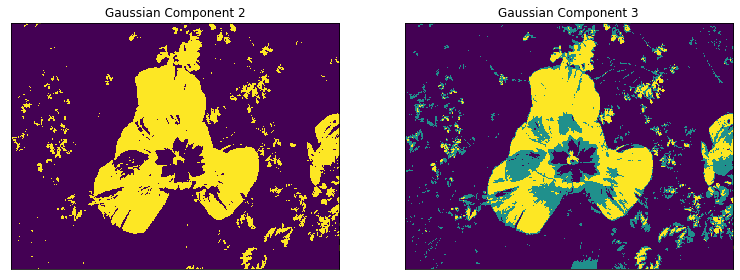

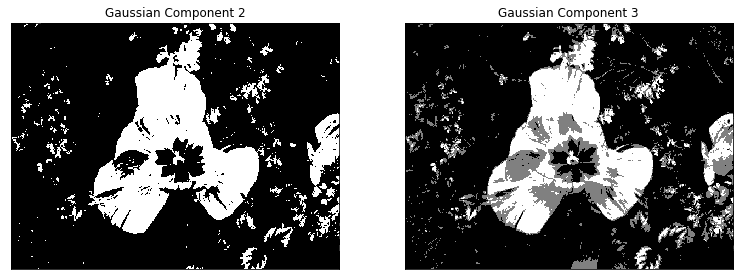

In [131]:
img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)


    
def compress(a):
    final = []
    i = 0
    while i < (len(a)-2):
        final.append(int(np.median(a[i:i+3], axis=0)))
        i += 3
    return np.array(final)
    
def EM(img, k, iters):
    
    img = img.flatten()
    

    #Creating random clusters         
    start = 0
    
    labels = np.zeros(len(img), dtype = int)
    for j in range(k):
        index = (1/k) * 255 * (j+1)
        labels[np.where((img >= start) & (img < index))] =j
        start = index
     
   
    
    for i in range(iters):
        
        #Maximaization       
        means = [] # means
        var = [] #variances
        fact = [] #gaussian weighing factors
        for j in range(k):
            X = img[np.where(labels==j)[0]]
            means.append(np.mean(X))
            var.append(np.var(X))
            fact.append(len(X) / len(img))
            
            
        #Expectation 
        
        #Gaussian Distribution Equation to calculate variance
        probs = np.array([ (1 / (math.sqrt(2*math.pi) * math.sqrt(var[n]))) * np.exp(-((img - means[n])**2) / (2*var[n])) for n in range(k)]).T
        probs *= fact
        for row in probs:
            row = row / sum(row)
        labels = np.argmax(probs, axis=1)
        
    return labels

height, width = img.shape[:2]
                                                                      

labels= EM(img,2,5) 
f_img= np.reshape(compress(labels), (height, width))  
labels2= EM(img,3,5) 
f_img2= np.reshape(compress(labels2), (height, width)) 

plt.figure(figsize=(20,20))
plt.subplot(132), plt.imshow(f_img)
plt.title('Gaussian Component 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(f_img2)
plt.title('Gaussian Component 3'), plt.xticks([]), plt.yticks([])
plt.show()


labels3= EM(img_grey,2,5) 
f_img3= np.reshape(compress(labels3), (height, width))  
labels4= EM(img_grey,3,5) 
f_img4= np.reshape(compress(labels4), (height, width)) 

plt.figure(figsize=(20,20))
plt.subplot(132), plt.imshow(f_img3, cmap="gray")
plt.title('Gaussian Component 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(f_img4, cmap="gray")
plt.title('Gaussian Component 3'), plt.xticks([]), plt.yticks([])
plt.show()



Both the features for segmentation almost have similar outputs. With color the pixel density after accumulation can be distinguished better than in gray-scale.

[[ 3.3387299  3.2746005]
 [-1.1492783  5.1540103]
 [ 6.3799067  3.2568216]
 ...
 [-9.305249  -5.80999  ]
 [-8.198358  -7.8035817]
 [-1.4862221 -4.789938 ]]
[60.57156378945708, 165.01155570116003]


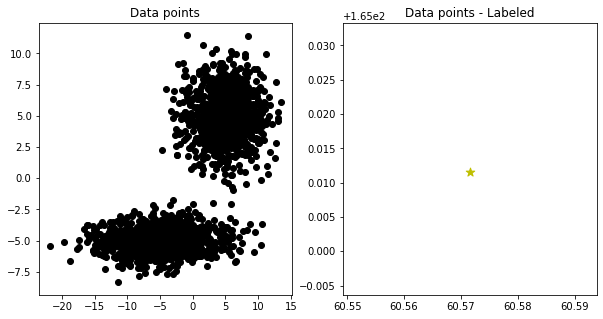

In [210]:
# generate data
data = np.float32(
       np.vstack((
       np.random.normal(loc=np.array([5,5]), scale=np.array([3,2]), size=(1000,2)),
       np.random.normal(loc=np.array([-5,-5]), scale=np.array([5,1]), size=(1000,2)))))

print(data)

labels = kmeans(data, 2, 10)

A = data[labels==0]
B = data[labels==1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data[:,0], data[:,1],"ko")
plt.title("Data points")
plt.subplot(122)
plt.scatter(A[:,0], A[:,1], color='b')
plt.scatter(B[:,0], B[:,1], color='r')
plt.scatter(centers[0], centers[1], s=80, color='y', marker='*')
plt.title("Data points - Labeled")
print(centers)
plt.show()

In [173]:
# generate data
data = np.float32(
       np.vstack((
       np.random.normal(loc=np.array([5,5]), scale=np.array([3,2]), size=(1000,2)),
       np.random.normal(loc=np.array([-5,-5]), scale=np.array([5,1]), size=(1000,2)))))



labels = EM(data, 2, 10)

#A = data[labels.ravel()==0]
#B = data[labels.ravel()==1]

#plt.figure(figsize=(10,5))
#plt.subplot(121)
#plt.plot(data[:,0], data[:,1],"ko")
# plt.title("Data points")
# plt.subplot(122)
# plt.scatter(A[:,0], A[:,1], color='b')
# plt.scatter(B[:,0], B[:,1], color='r')
# plt.scatter(centers[:,0], centers[:,1], s=80, color='y', marker='*')
# plt.title("Data points - Labeled")
# plt.show()

K-means algorithm is depended on the data distribution's compactness. So for cases like where the points are pretty far from each other such as if there are outliners, then the cluster becomes unreliably big. It takes into account similar points far away from nearby clusters. If the distribution is compact kmeans would have similar solution like EM. EM takes considers the probability which is not affected by any points(outliers) being far from a cluster. Therefore, EM will give better results.

# Graph-Cut

In [195]:
img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)


def graph_cut(compact,n_seg, thresh):
    


    labels1 = segmentation.slic(img, compactness=compact, n_segments=n_seg)
    out1 = color.label2rgb(labels1, img, kind='avg')
    rag = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, rag,thresh)
    out2 = color.label2rgb(labels2, img, kind='avg') 
    
    plt.figure(figsize=(20,20))
    plt.subplot(121), plt.imshow(out1)
    plt.title("Segmented Image,\n Compactness= " + str( i ) + ",\n n_segments= "+ str(s)), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(out2)
    plt.title("Segmented Image,\n Compactness= " + str( i ) + ",\n n_segments= "+ str(s) + ", \n threshold=  " + str(t))
    plt.xticks([]), plt.yticks([])
    plt.show()
    

   

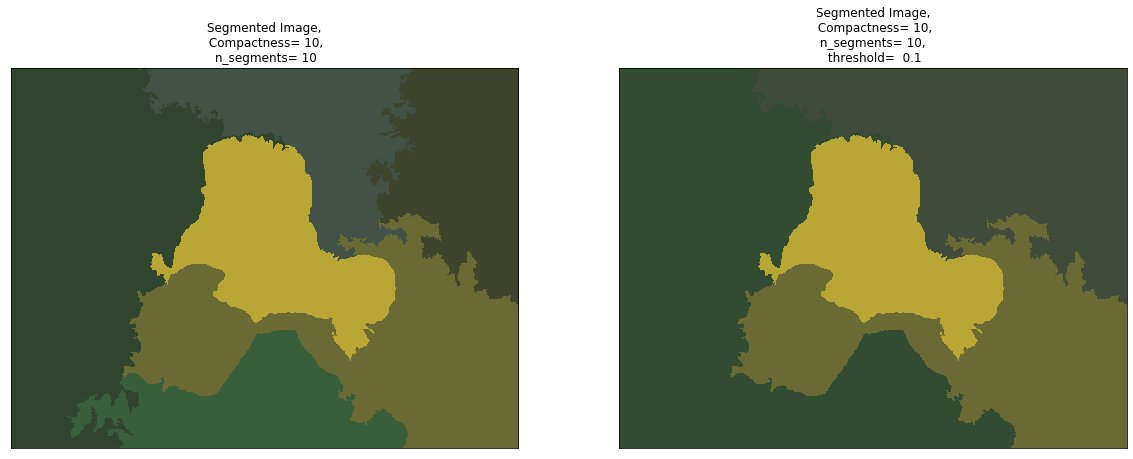

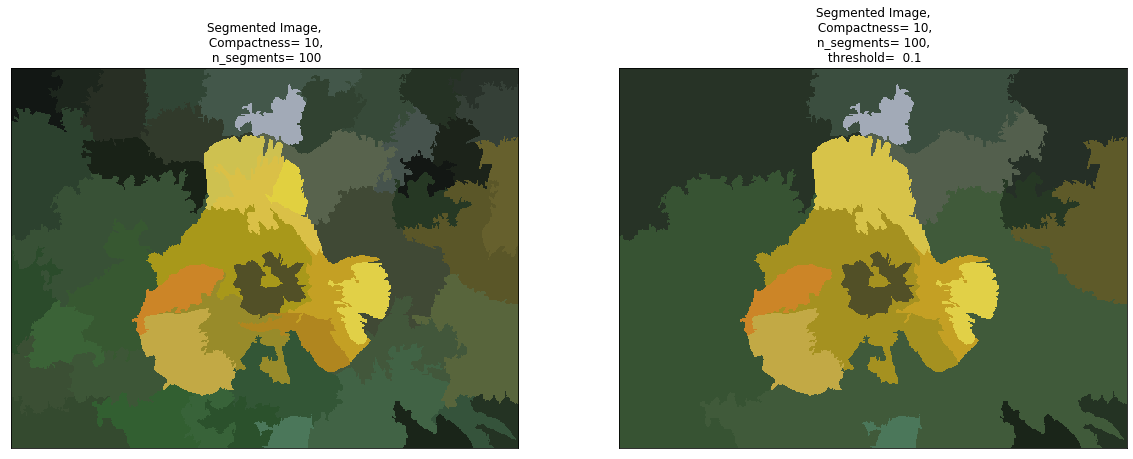

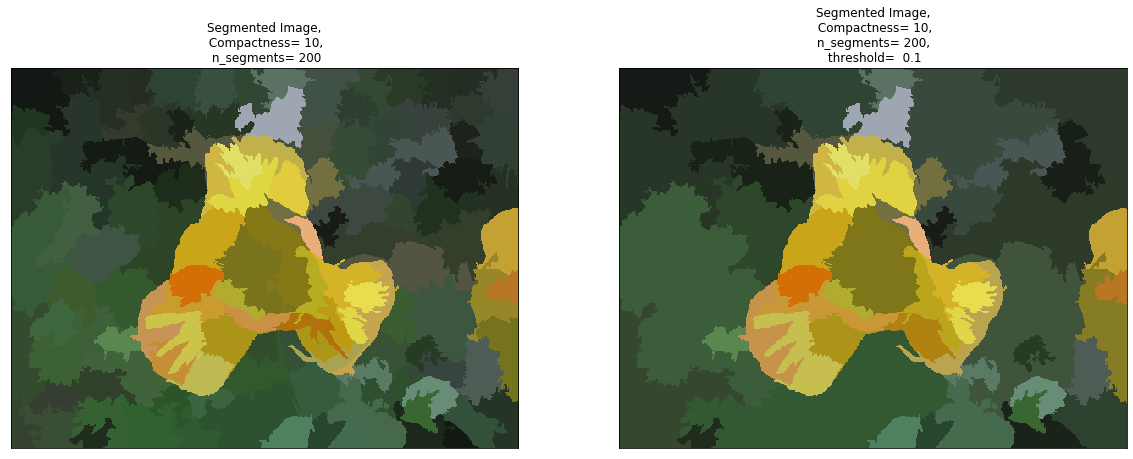

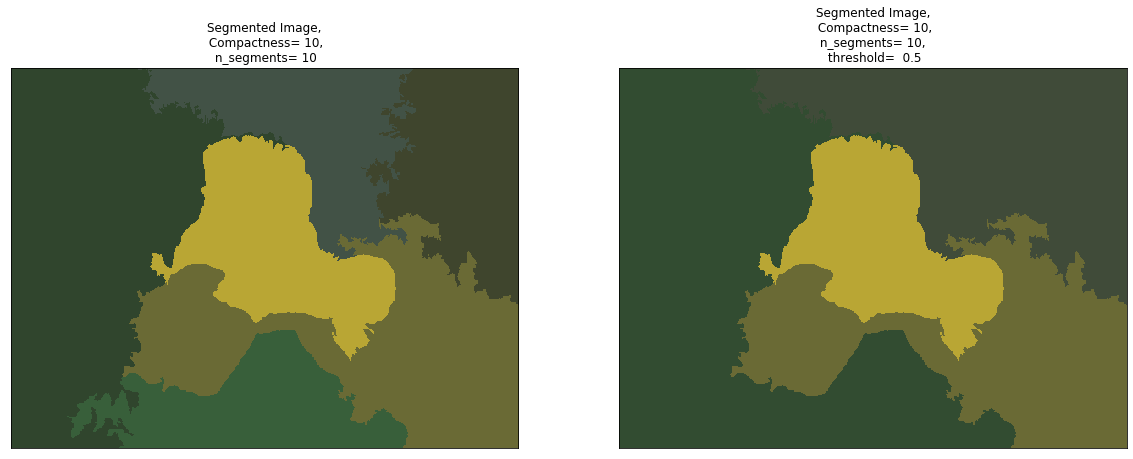

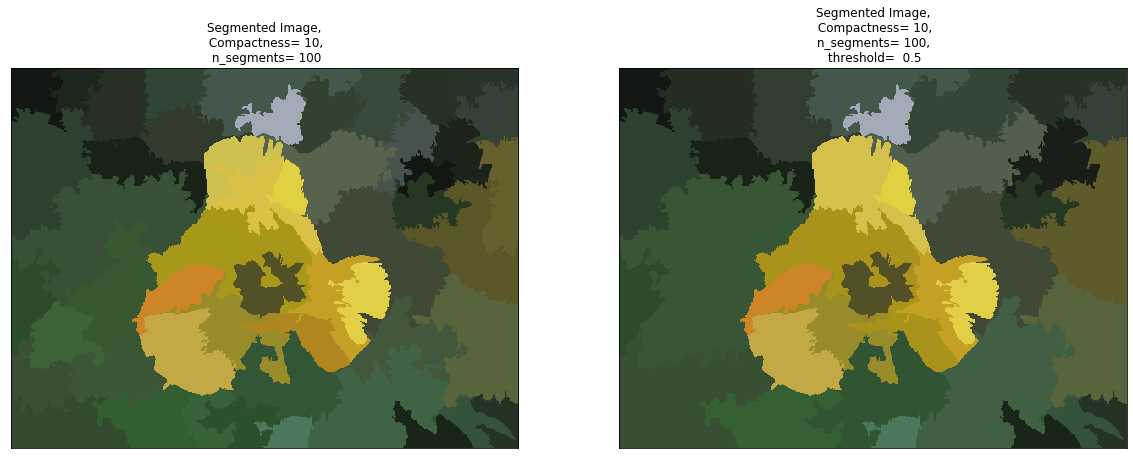

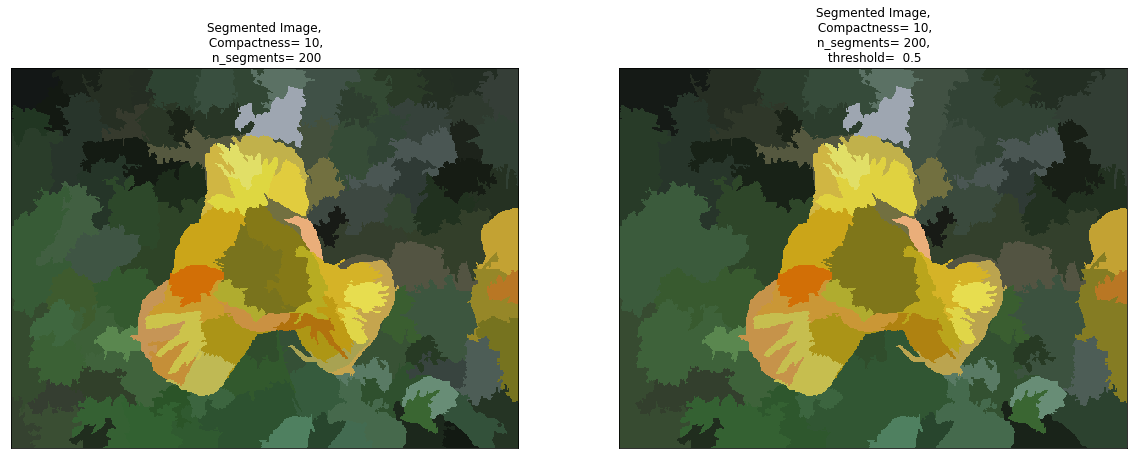

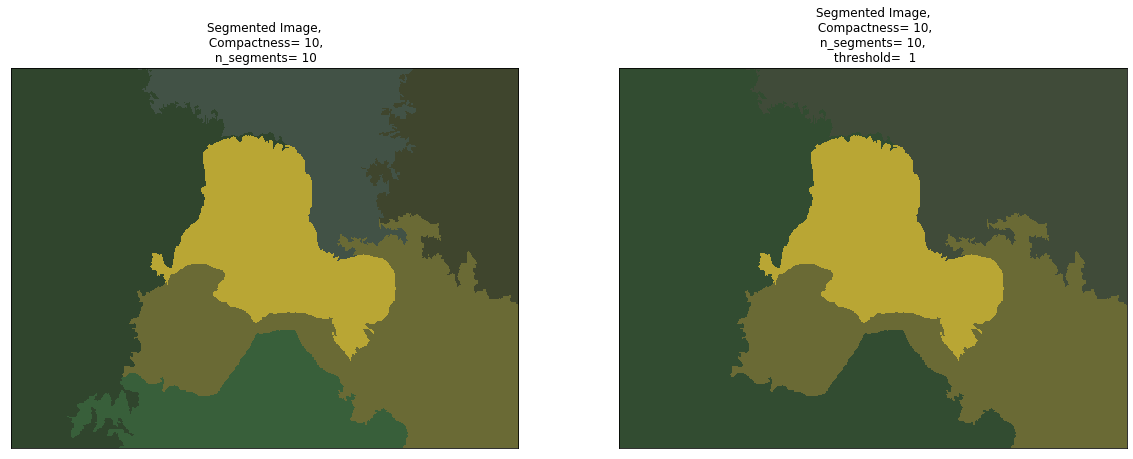

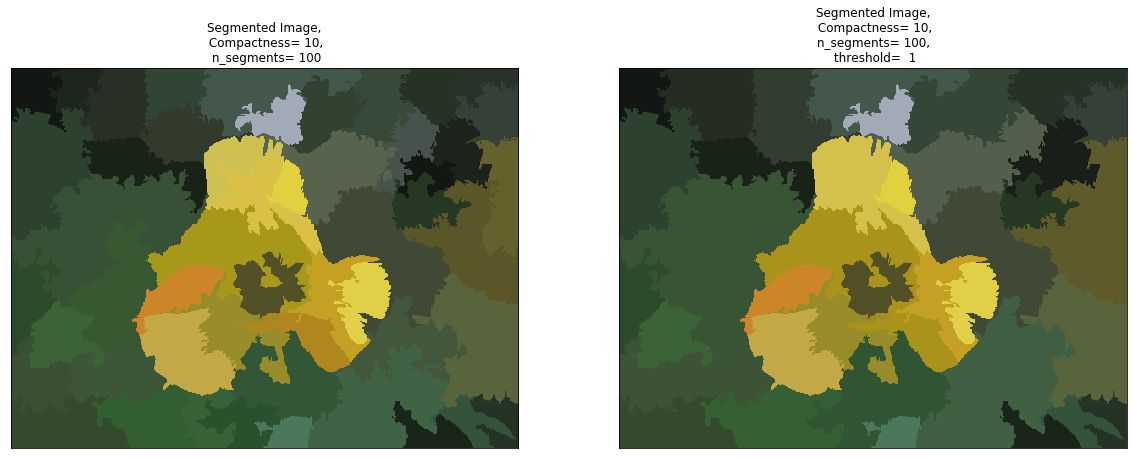

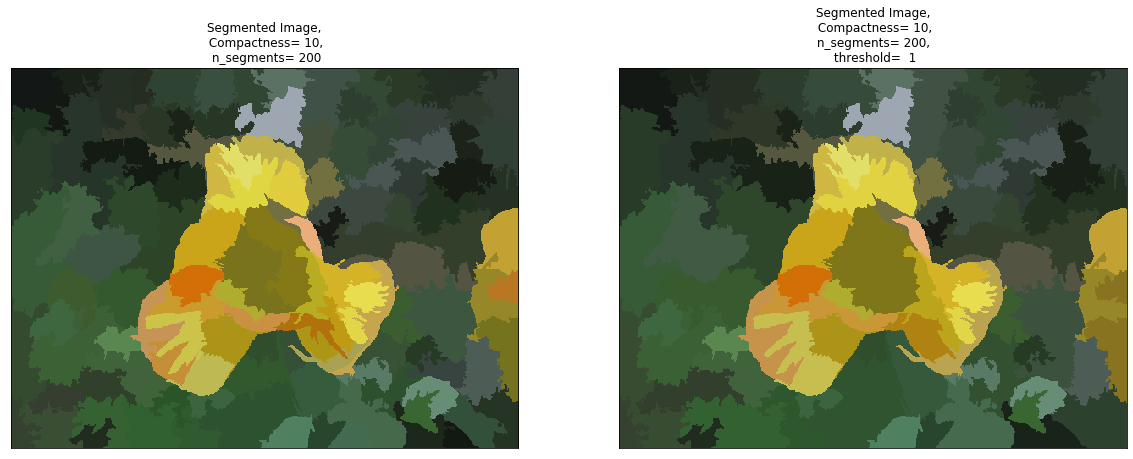

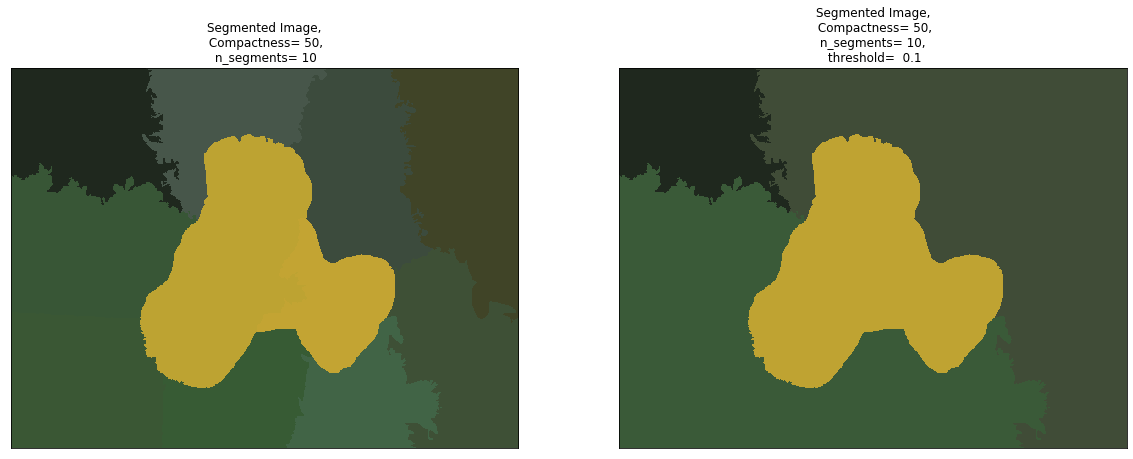

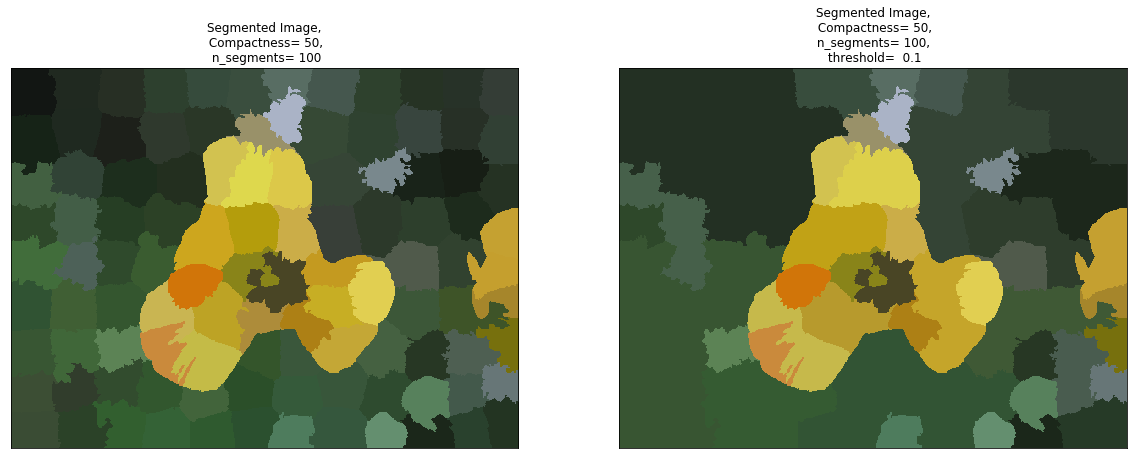

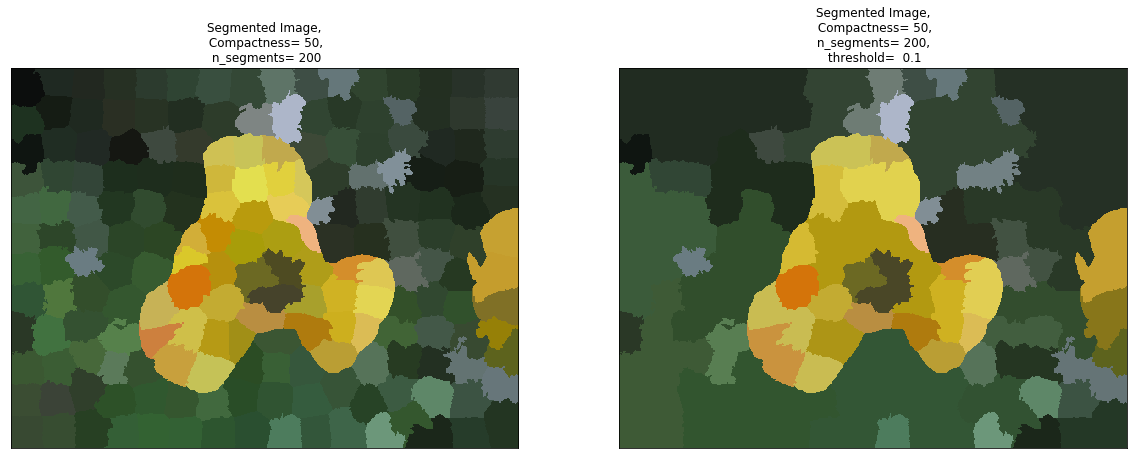

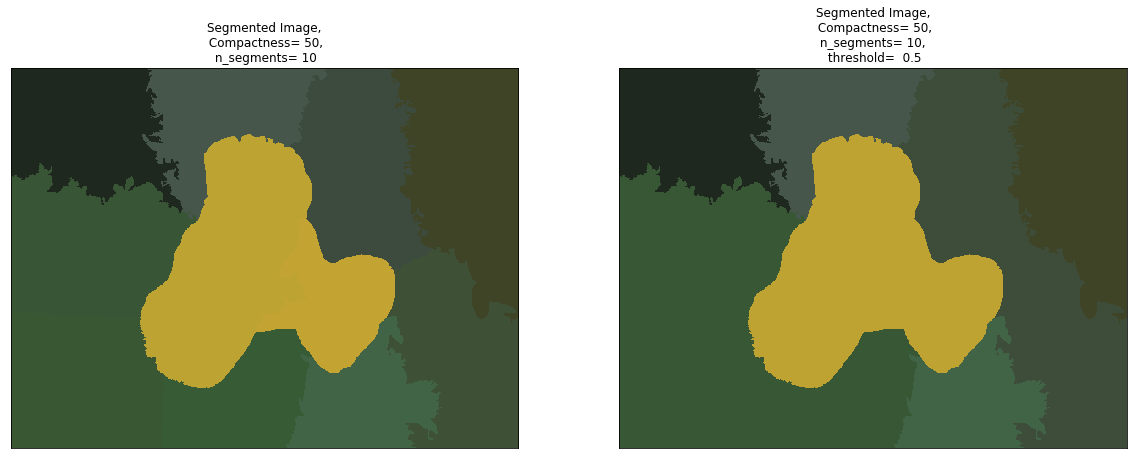

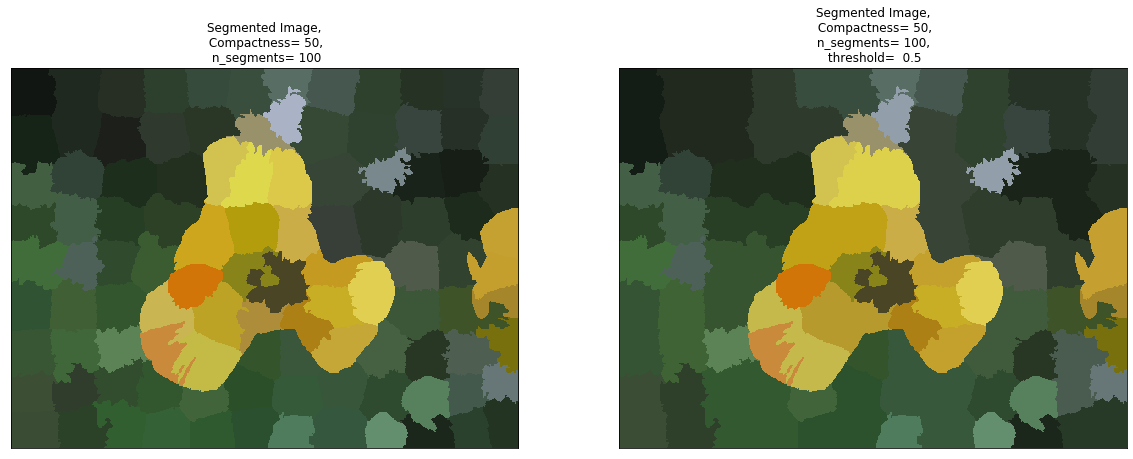

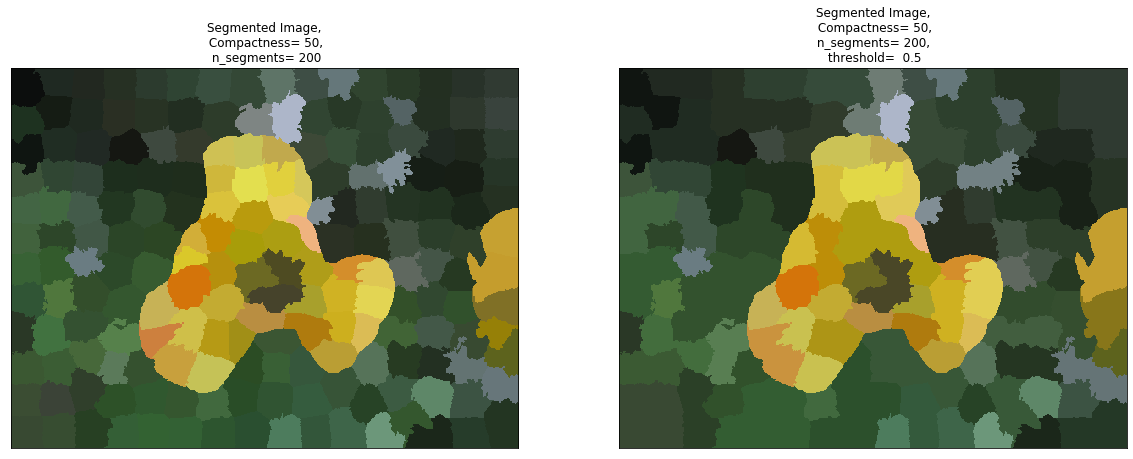

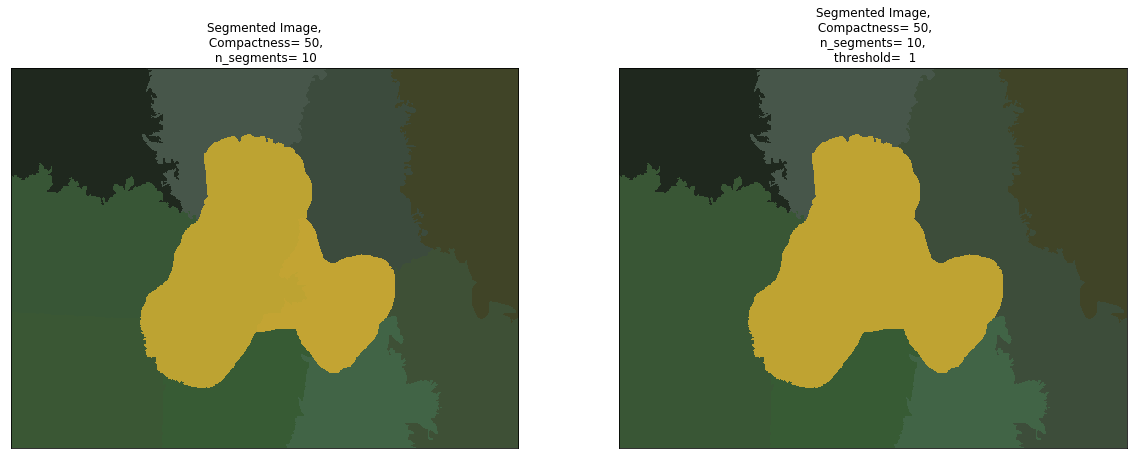

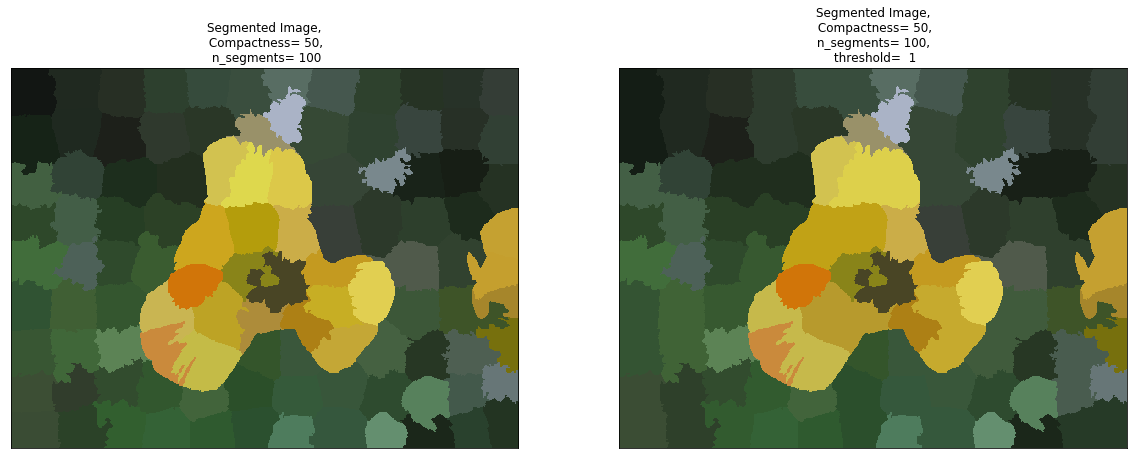

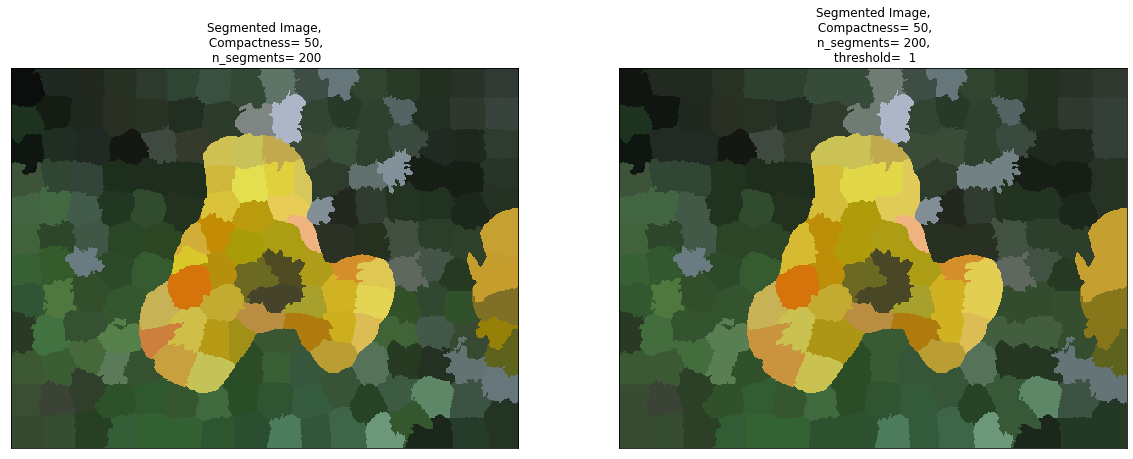

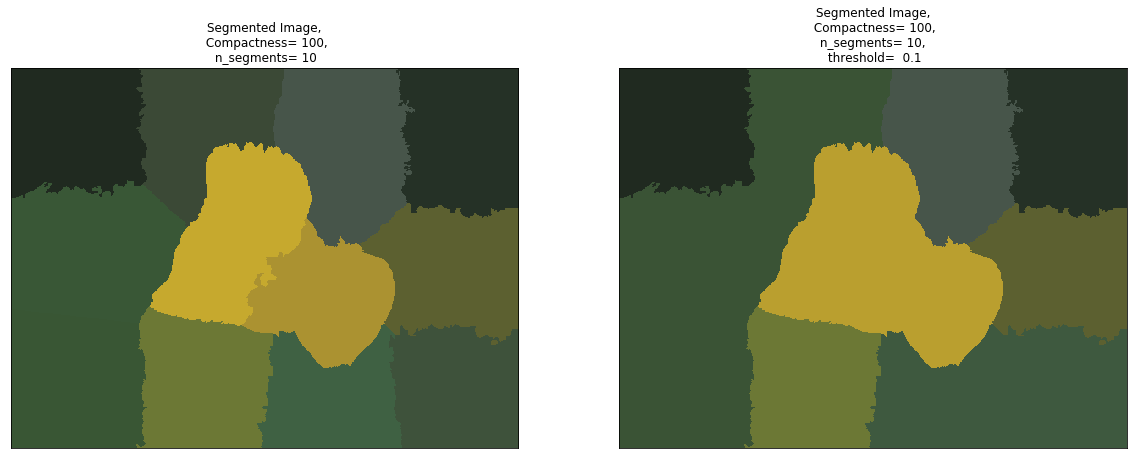

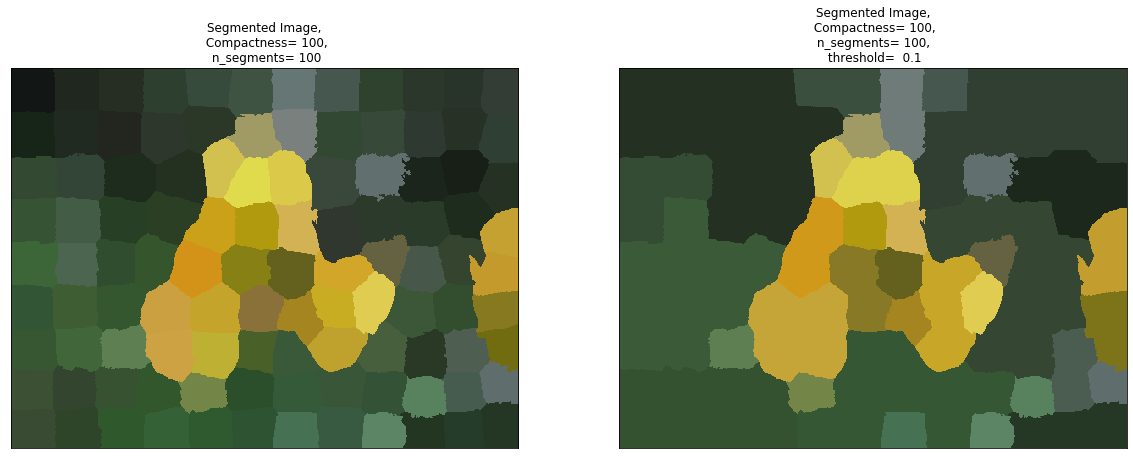

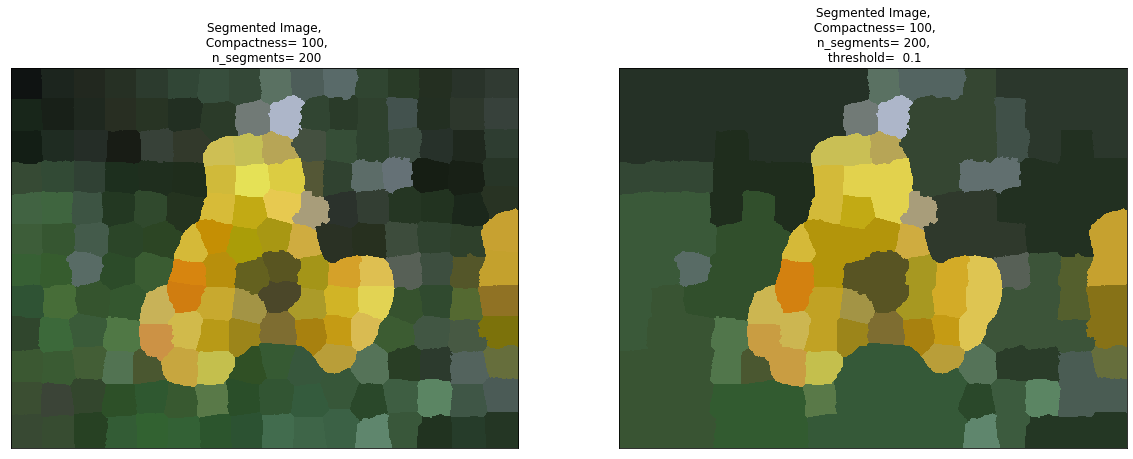

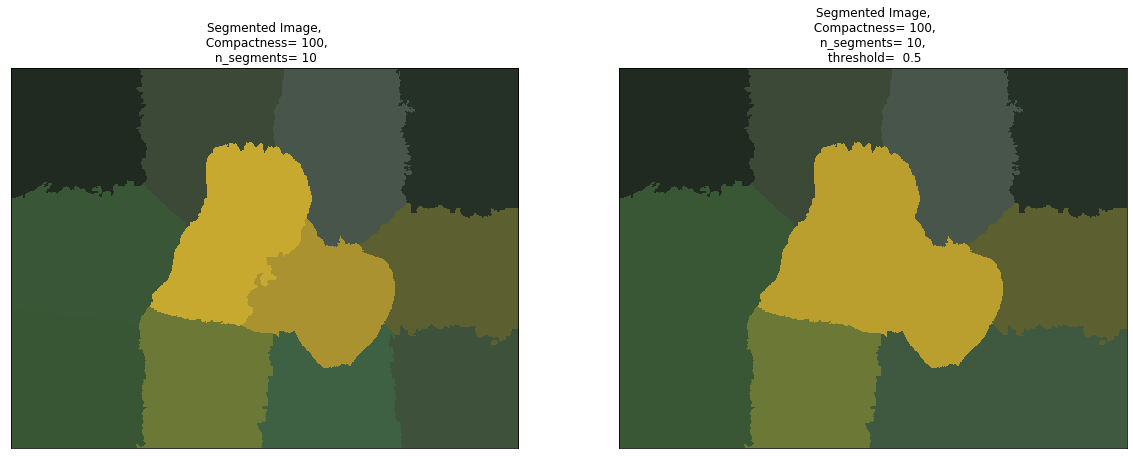

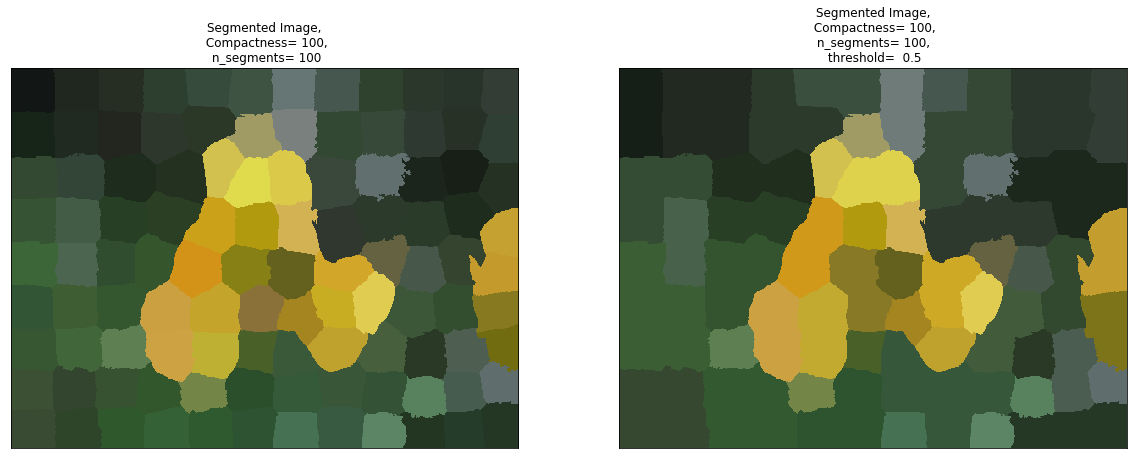

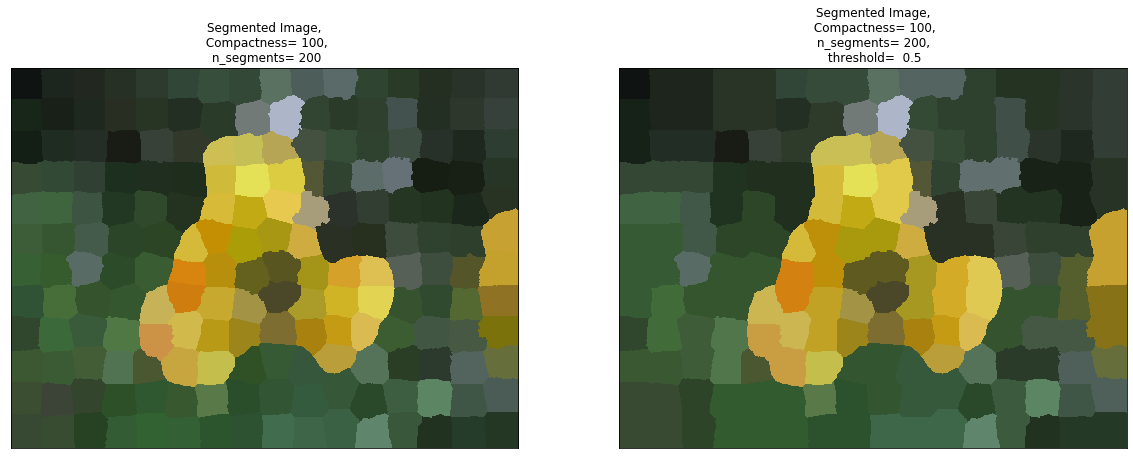

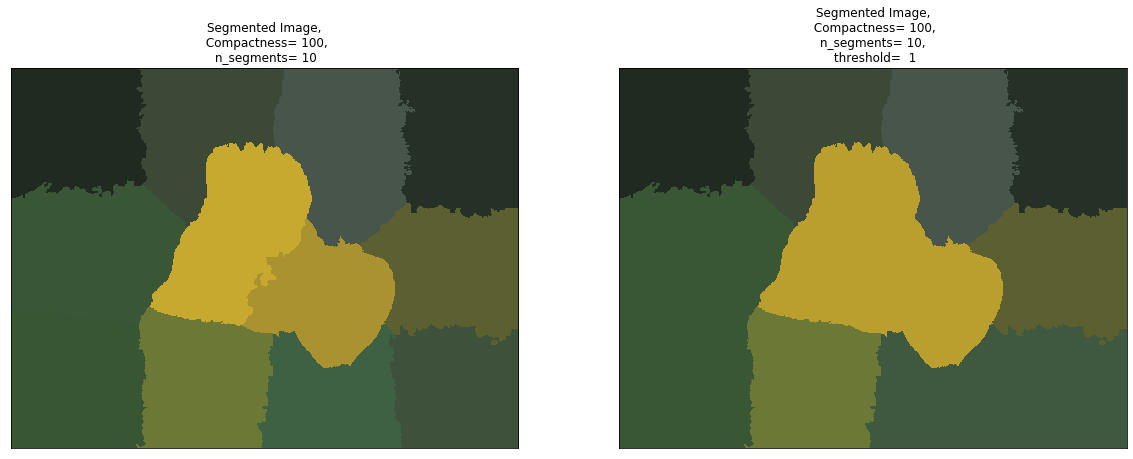

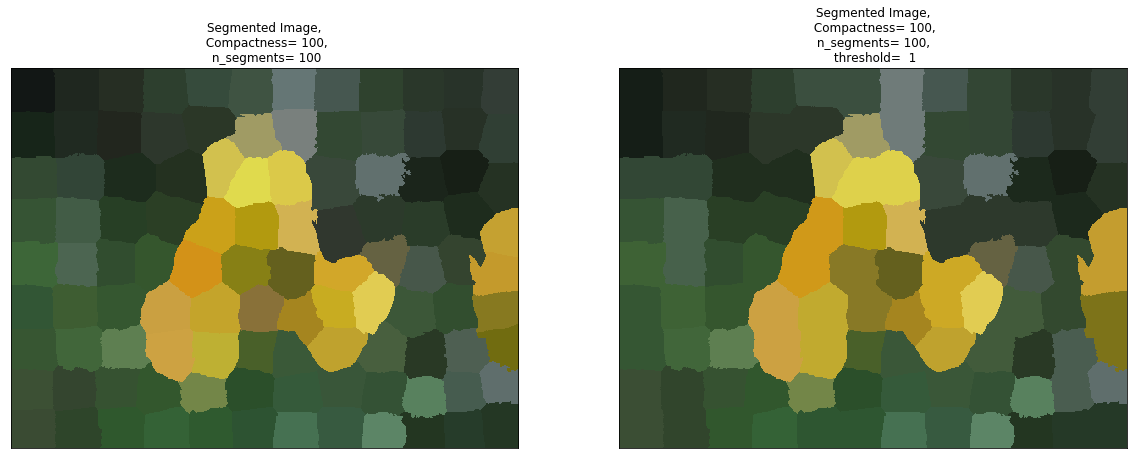

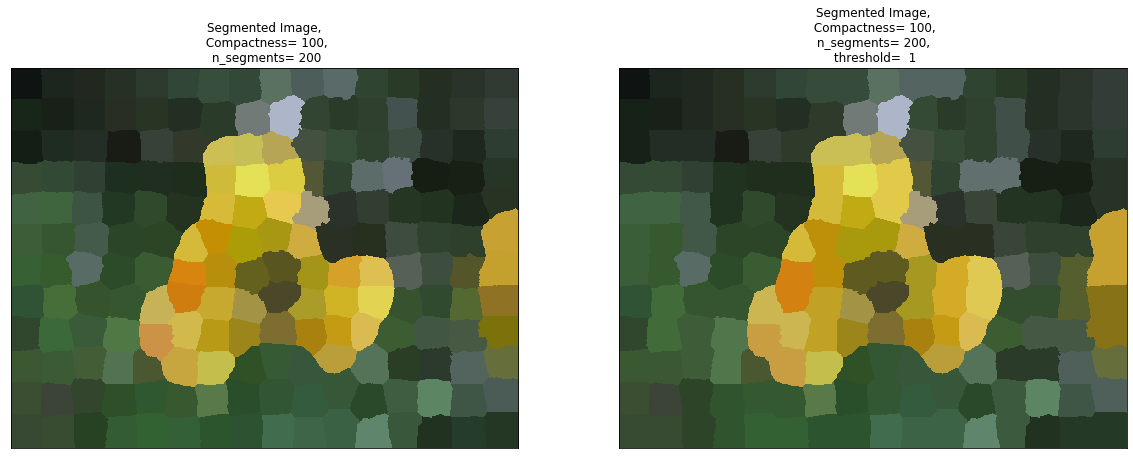

In [180]:
# varying different parameters
compactness = [10,50,100]
threshold = [0.1,0.5,1]
n_segments = [10,100,200]


disp_image = []
for i in compactness:
    for t in threshold:
        for s in n_segments:
            disp_image.append(graph_cut(i,s,t))

Changing the number of segments, increases the clustering and more distinguished colours can be observed. However, if the number of segmentation is very high it just ends up having multiple clusters.

The effect of increasing the threshold from 0.1 to 1.0 is also the same . More distinguished clusters can be seen when threshold goes up.

Increasing compactness up to a certain value, increases more colour clusters but if it’s too high it ruins the segmented images. After a certain value, the clusters will become blurry and different features of the object gets ruined. 

# Mean-Shift

In [193]:
img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)


def mean_shift(ratio, kernel_size , max_dist):

    label = quickshift(img, ratio, kernel_size, max_dist)
    out = color.label2rgb(label, img, kind='avg')

# display
    plt.figure(figsize=(10,10))
    plt.imshow(out)
    plt.title("Segmented Image,\n ratio= " + str( r ) + ", \n kernel_size=  " + str(k) + ",\n max_dist= "+ str(m)), plt.xticks([]), plt.yticks([])
    plt.show()

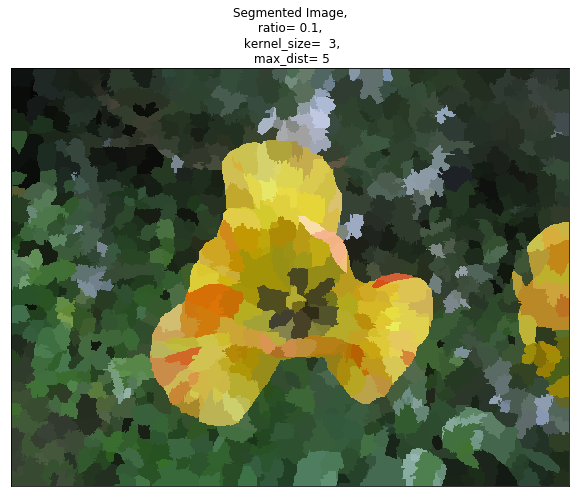

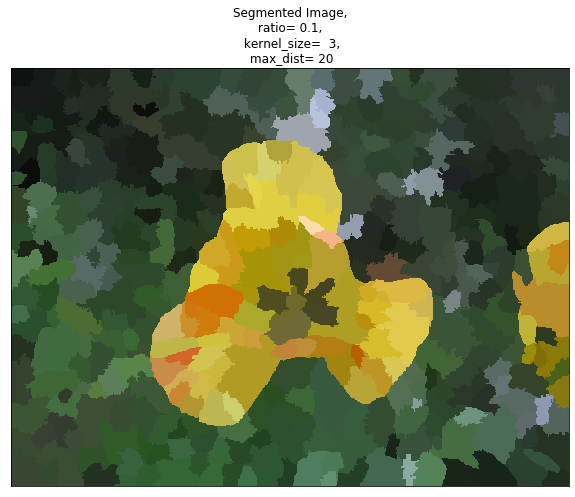

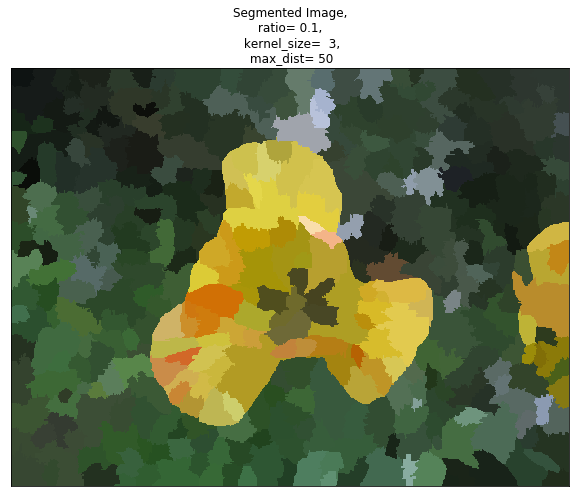

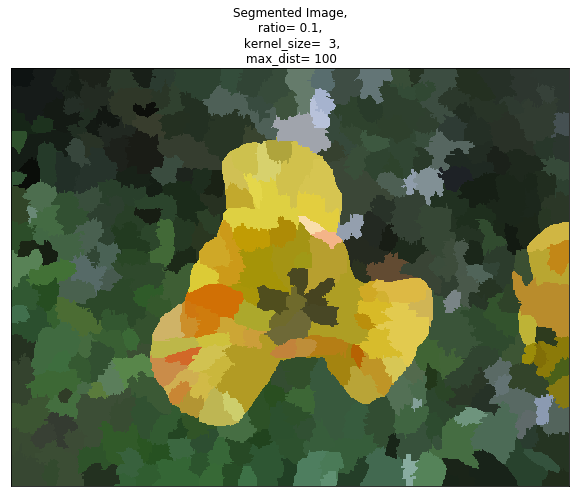

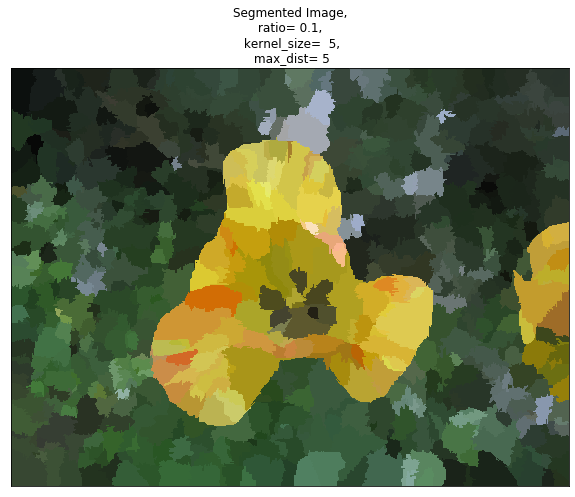

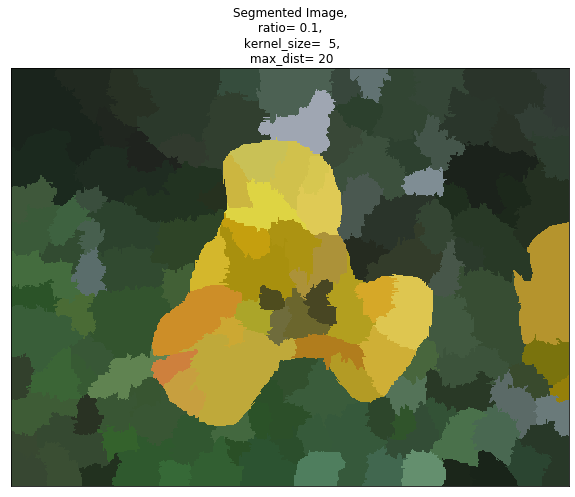

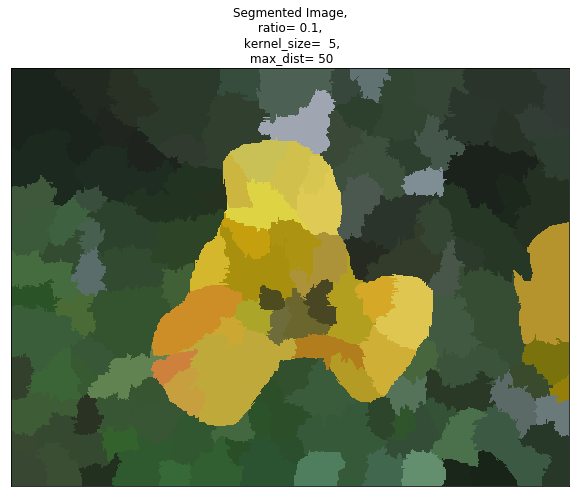

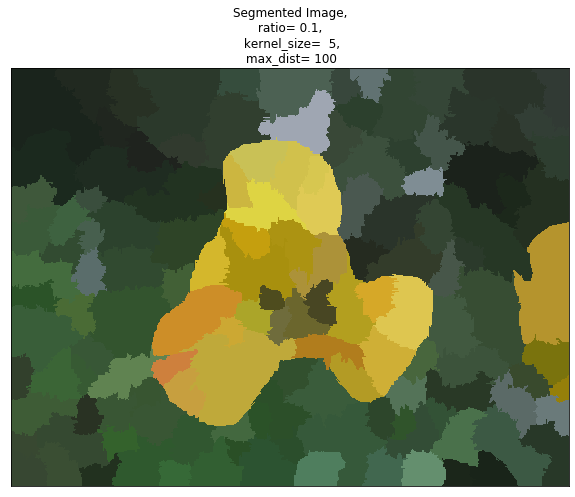

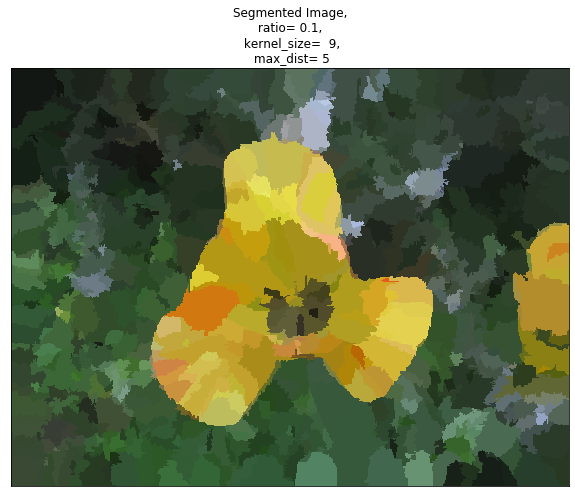

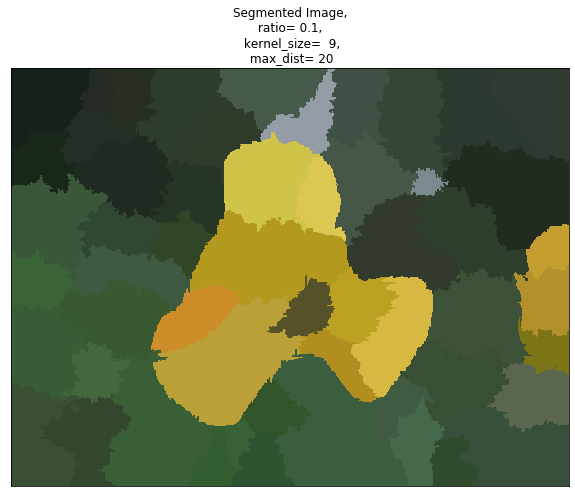

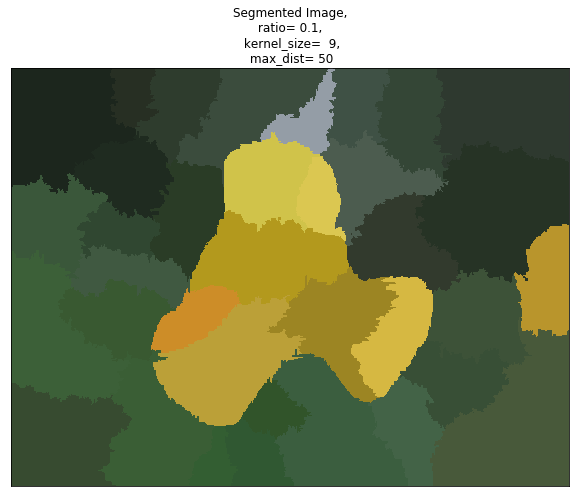

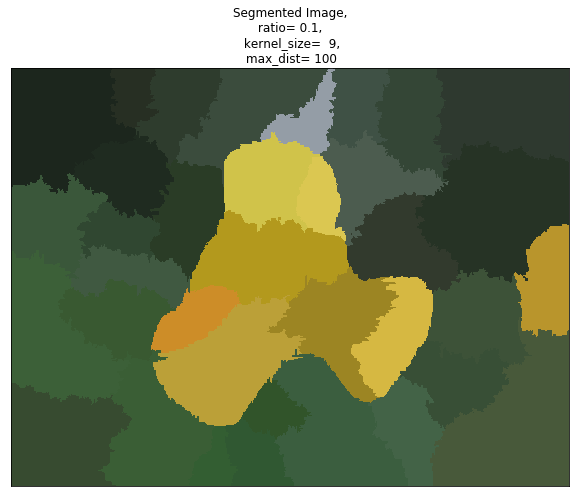

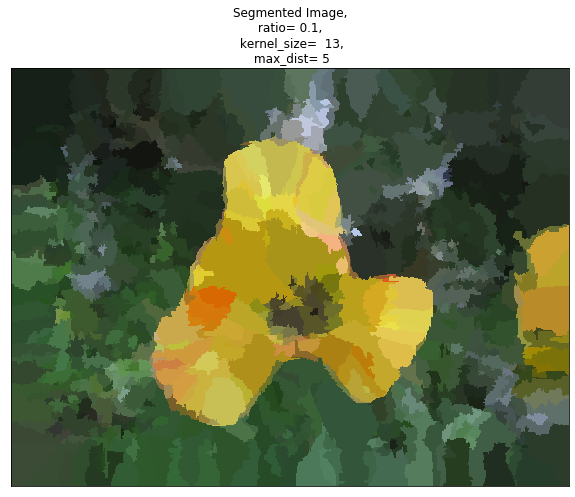

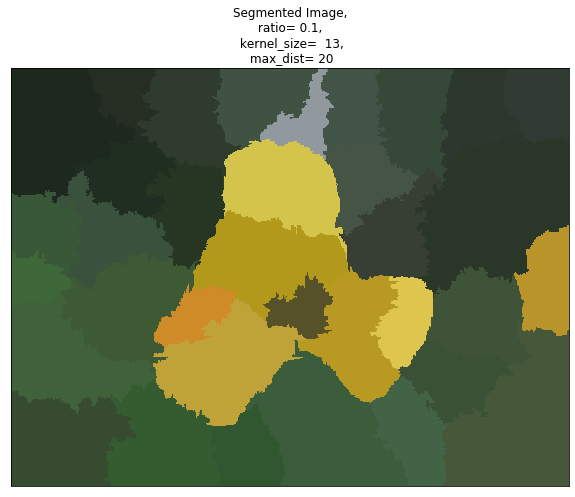

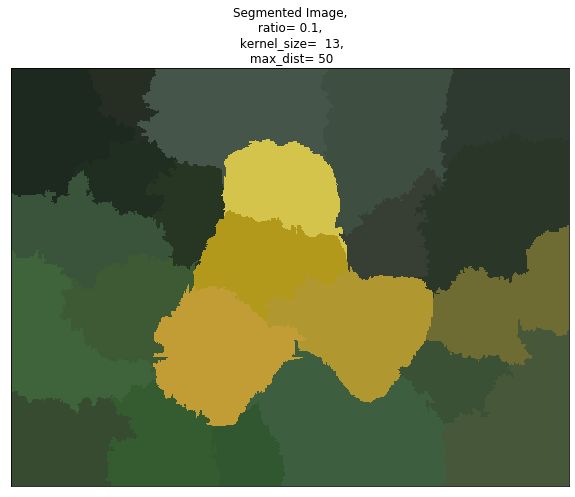

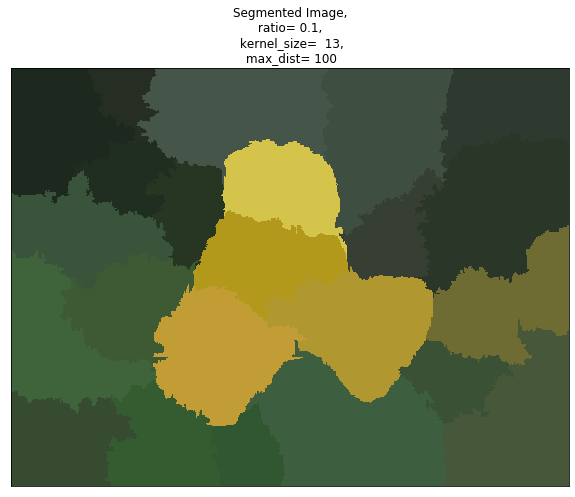

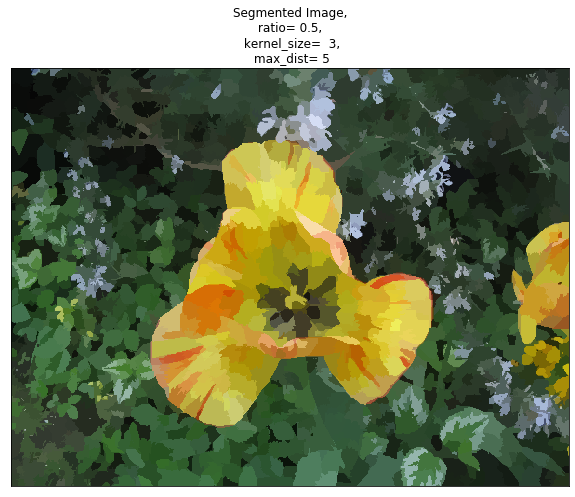

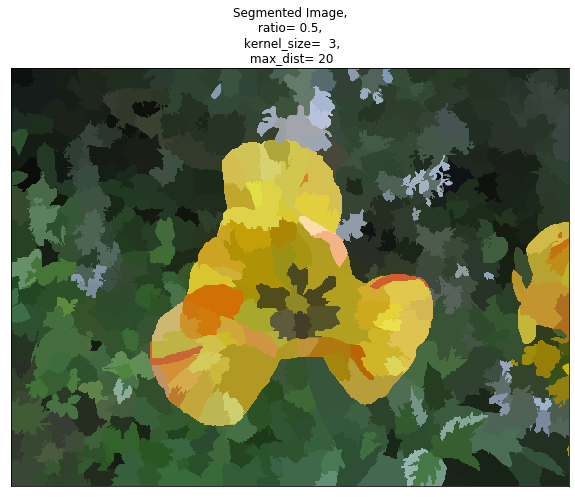

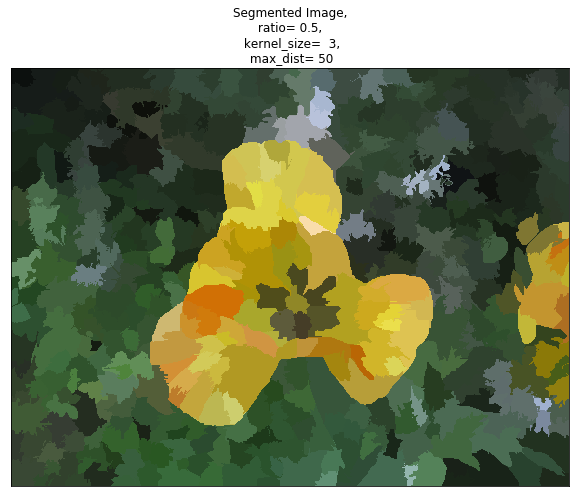

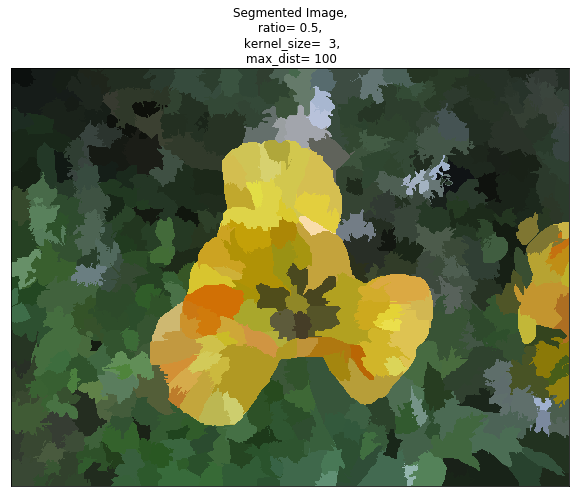

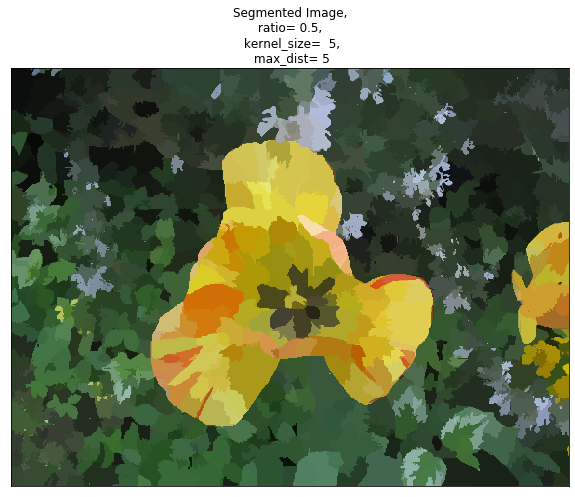

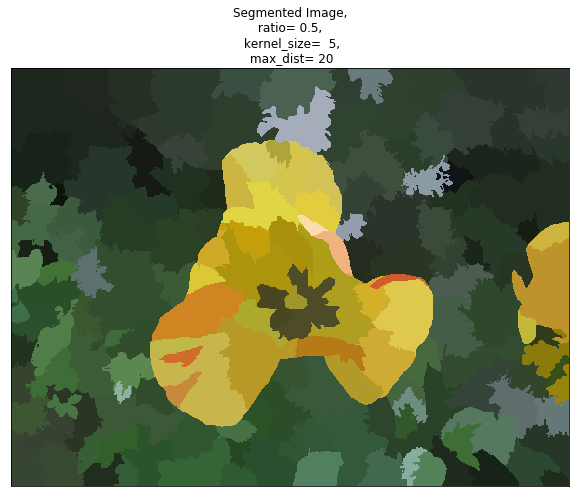

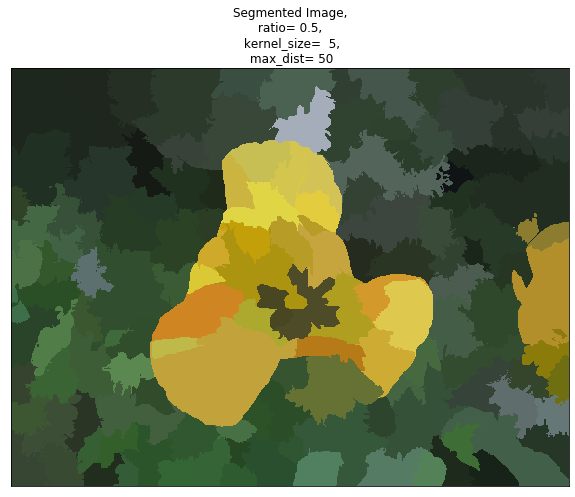

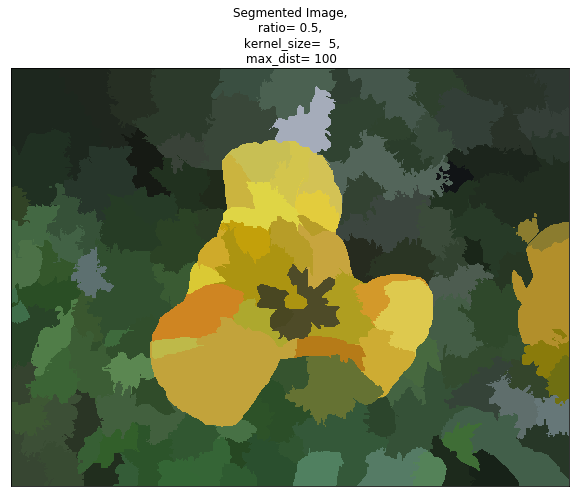

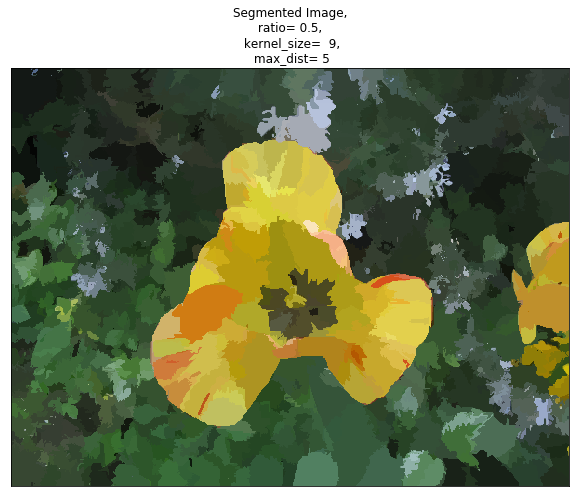

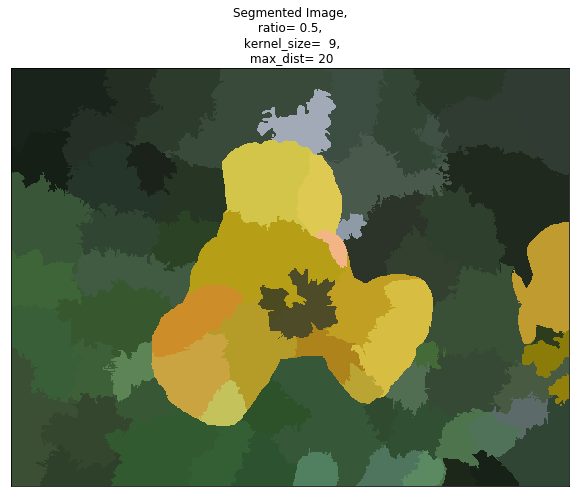

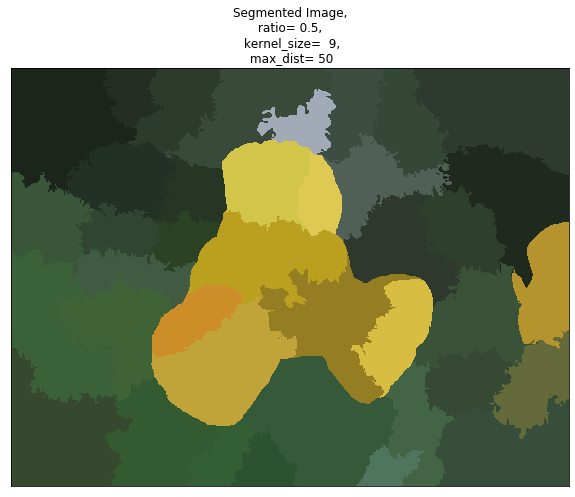

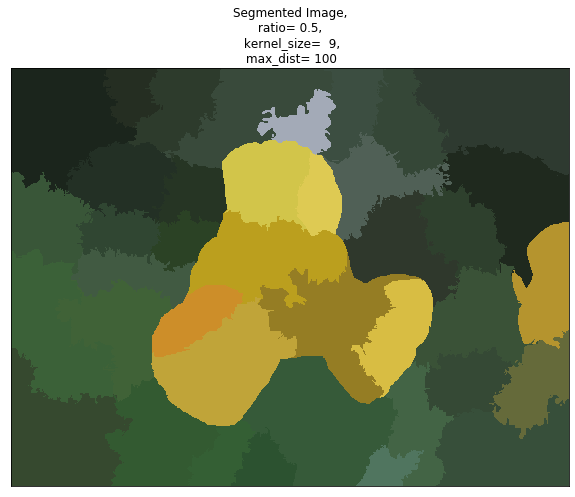

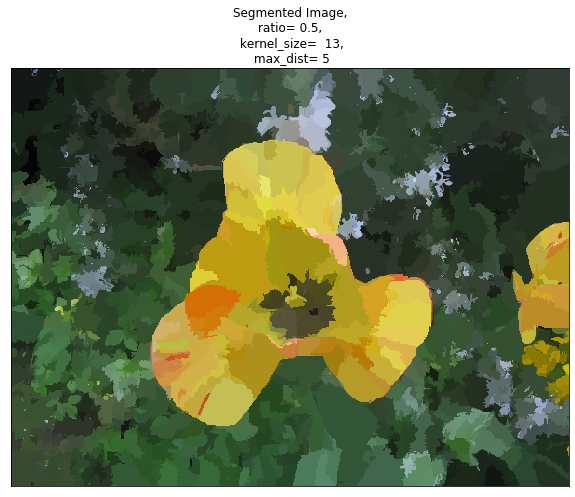

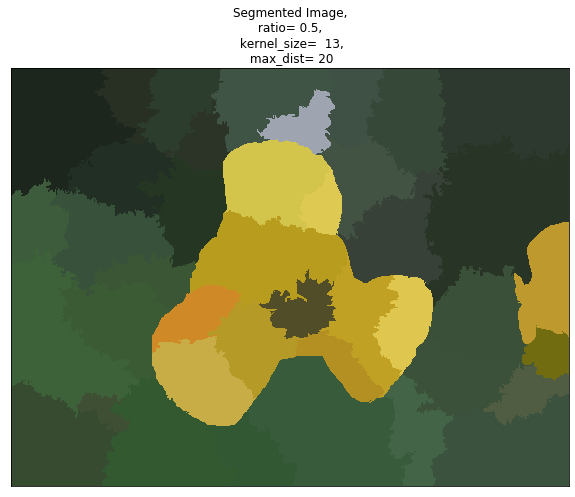

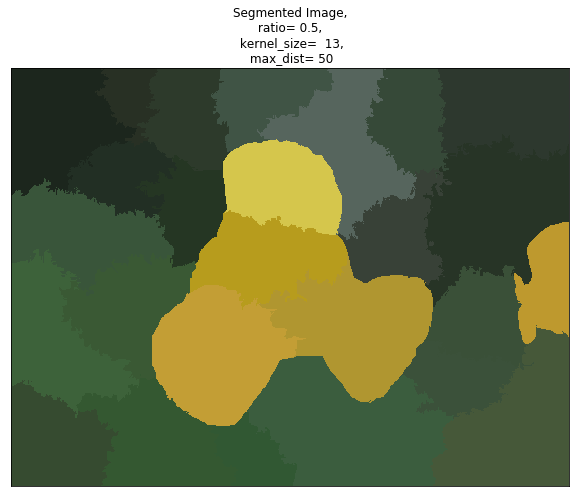

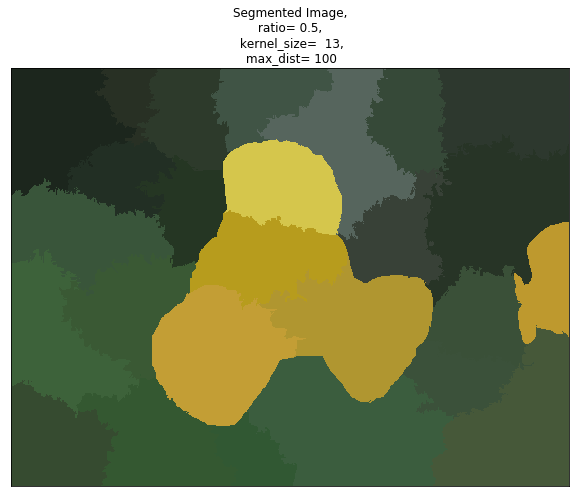

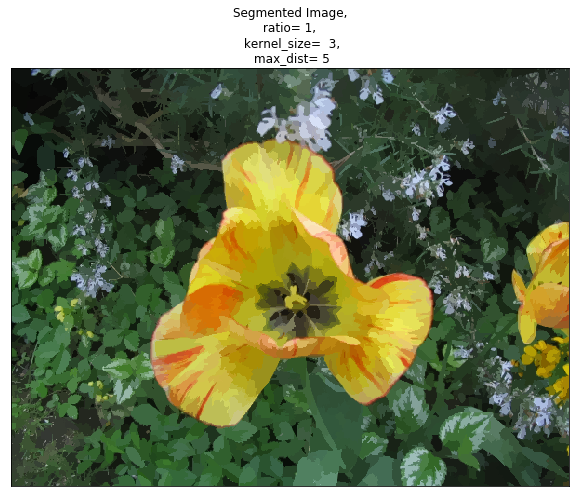

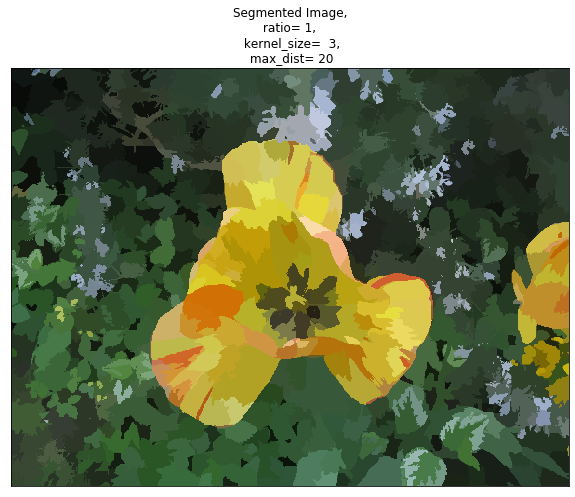

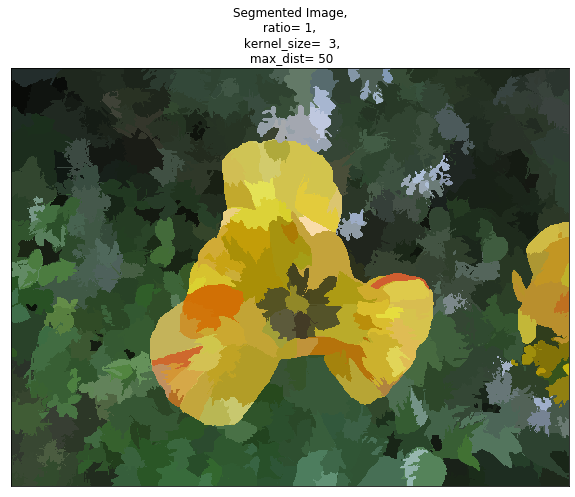

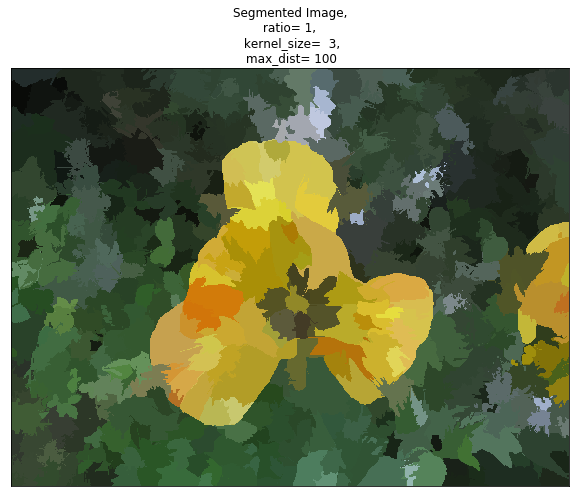

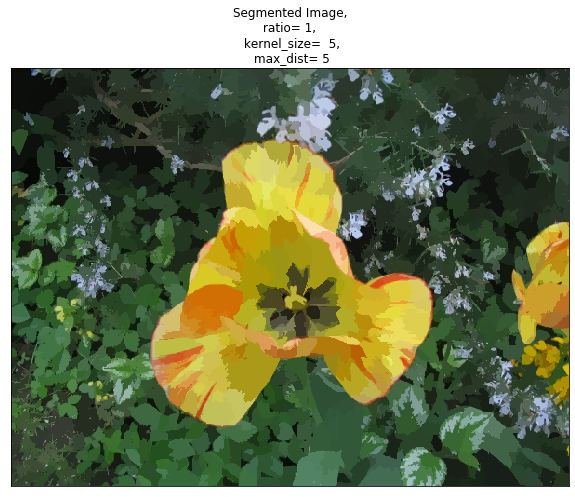

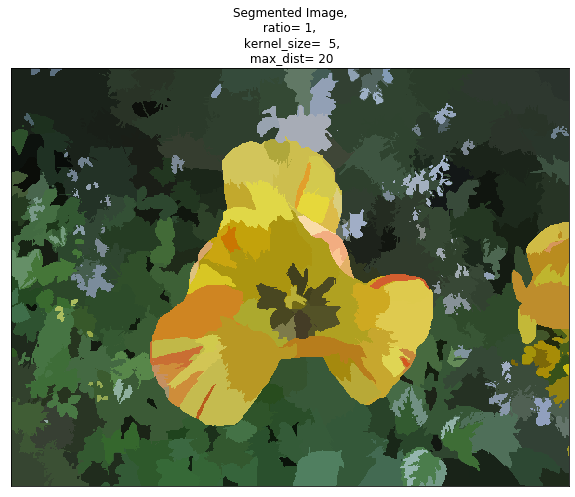

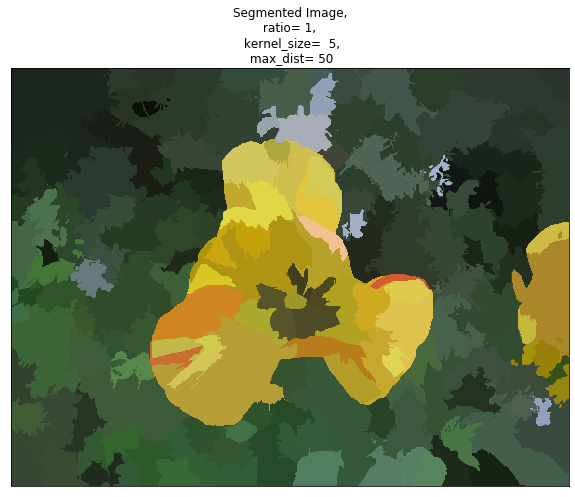

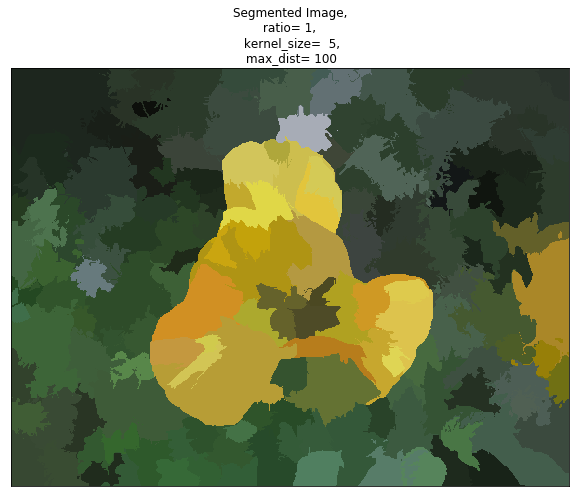

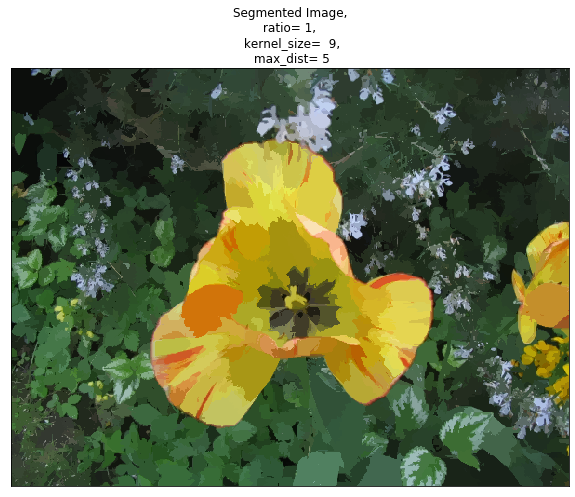

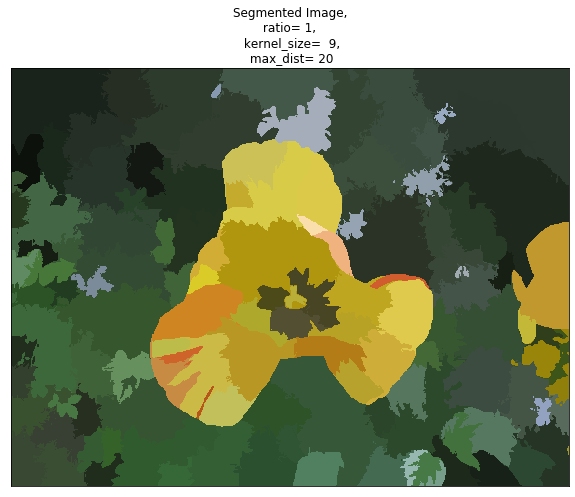

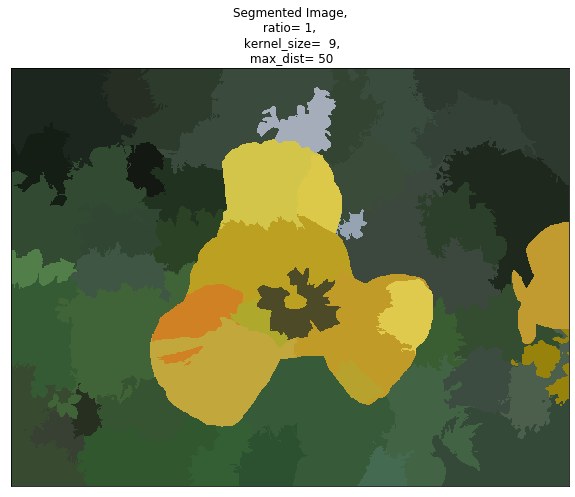

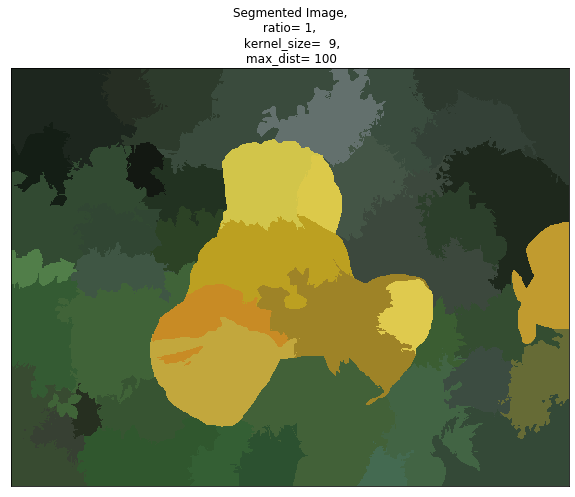

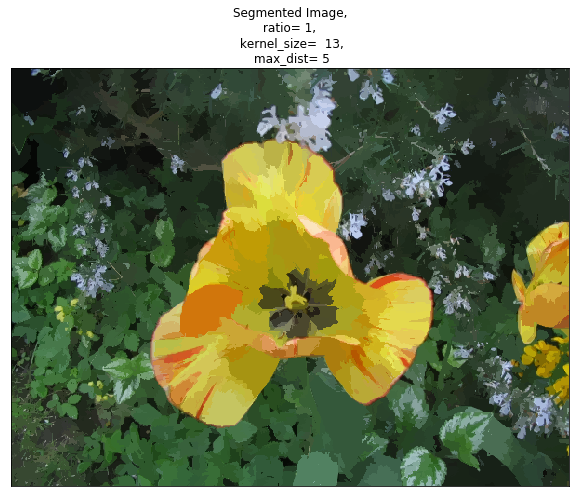

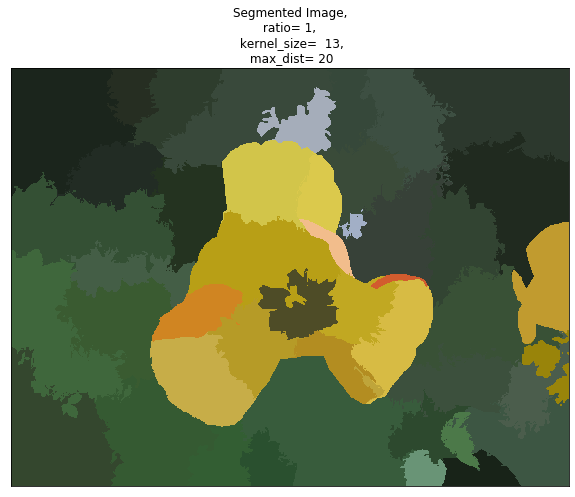

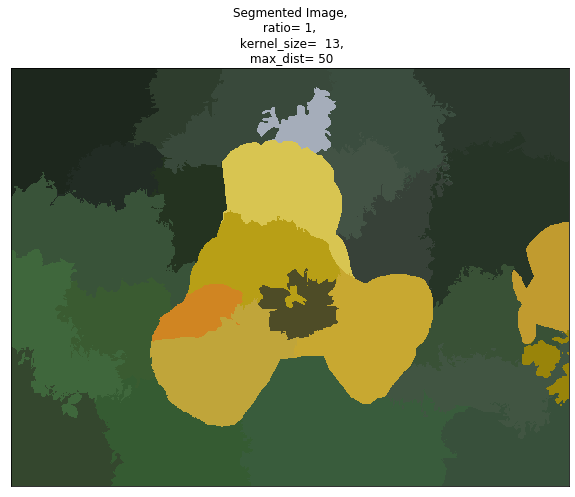

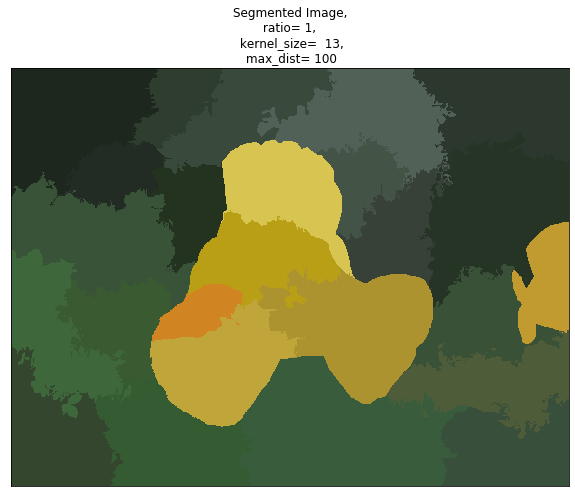

In [194]:
ratio = [0.1,0.5,1]
kernel_size = [3,5,9,13]
max_dist = [5,20,50, 100]

image = []
for r in ratio:
    for k in kernel_size:
        for m in max_dist:
            image.append(mean_shift(r,k,m))

Increasing max_dist, the objects in the images loses it's sharpness and features. The cluster size increases and the clusters become blurrier. Increasing the kernel size, similar effect can be observed. Cluster size increases as nearby similar colour pixels now form a bigger cluster. Increasing the ratio, the image tends to become more like the original image. The different colour pixels are not clustered together and all the different shades of colour can be observed.